### 感知器
整个数据集中的每一个点都会把分类的结果提供给感知器（分类函数），并调整感知器。——这就是计算机在神经网络算法中，找寻最优感知器的原理。
#### 感知器算法
掌握了感知器技巧后，我们就可以编写完整的感知器运算的算法了！
下面的视频将介绍感知器算法的伪代码，现在你还不需要担心什么是学习速率（learning rate），我们在之后的课程中会详细介绍为什么这里的伪代码中有学习率。你将有机会用 Python 将其编成代码，并看看自己的感知器分类成果。加油！
```
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    print((np.matmul(X,W)+b)[0])
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines
```

### 非线性界限
初始的感知器适应的是线性界限，实际中界限往往是曲线、两天直线交叉、圆形，这时就不能使用线性感知器，需要改造感知器，使其适应除直线外的
其它类型曲线。  

## 误差函数error function
感知器算法实现告诉我们，获取正确分类的方式，就是通过每一个错误分类的点，评估错误点位置与我们期望位置之间的差异，来慢慢的修正我们分类函数。

因为误差暗示了如何进行正确的分类，因此误差的定义就变得尤为重要，这也被称为误差函数。

### 误差函数与梯度下降  
误差函数提供给我们的预测值与实际值之间的差异，但是这个差异如何指导我们权重的更新呢？我们的目标是找到**最小**的误差函数值来找到与实际值误差最小的预测值。

在简单的线性方程中，我们可以通过判断“预测值与实测值相比是大了还是小了”来决定权重是增加还是减少。但是在更为复杂的非线性环境中呢？复杂的数学问题，我们就直接来看看学者们的解决策略。

假设一维问题是一条直线，那么二维问题就是一个平面，而三维问题就是一个曲面。曲面可以理解为有山峰也有低谷的地面，误差最小的地方就是低谷处，我们希望计算机找到的就是这个低谷的值。为了找到这个低谷，学者们发明了**梯度下降**。
- 减少误差，使错误尽可能减少到0.
- 误差函数不能是离散的，应该是连续的。因为若是离散的，在进行一次或几次计算后，不知如何向哪个方向前进。  
### 如何定义误差函数
对于优化而言，连续型误差函数比离散型discrete函数更好。为此，我们需要从离散型预测变成连续型预测。-->使用sigmoid函数  

### 多类别分类与softmax函数
```softmax函数
import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())

```

## one-hot 编码
用来处理非数字型数据，通过one hot编码将数据转换为数字。

### 最大似然法maximum likelihood
最大化概率，是否等于最小化误差。

#### 交叉熵cross entropy
对数据点的概率取以e为底的对数，然后对其相反数求和，称为交叉熵。
- 准确的模型，得到较低的交叉熵
- 误差较大的模型，得到的交叉熵较高  
（这个结果和变化交叉熵之前的相反，【即：数据点概率的乘积】）
> 最大化概率，转化为最小化交叉熵，寻找的误差函数即为这个交叉熵。

我们遇到了某种规律，概率和误差函数之间肯定有一定的联系，这种联系叫做交叉熵。这个概念在很多领域都非常流行，包括机器学习领域。我们将详细了解该公式，并编写代码！
#### 交叉熵公式 cross entropy formula
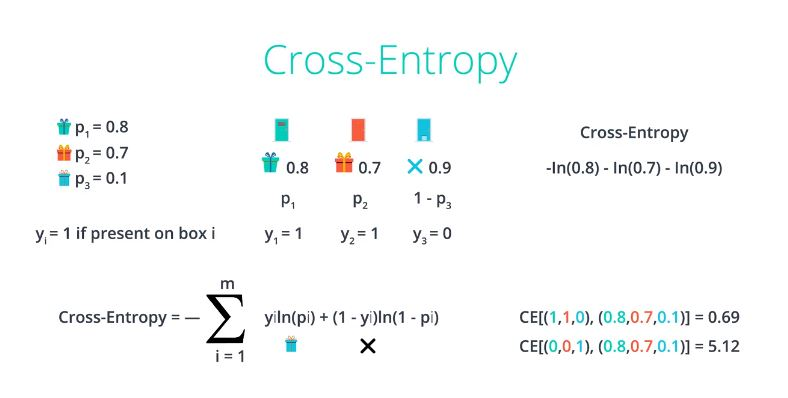


```crossentropy
import numpy as np

#Write a function that takes as input two lists Y, P,
#and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

```

-------------------
``` output
Trying for Y=[1,0,1,1] and P=[0.4,0.6,0.1,0.5].
The correct answer is
4.8283137373
And your code returned
4.8283137373

Correct!
```

### 多类别交叉熵
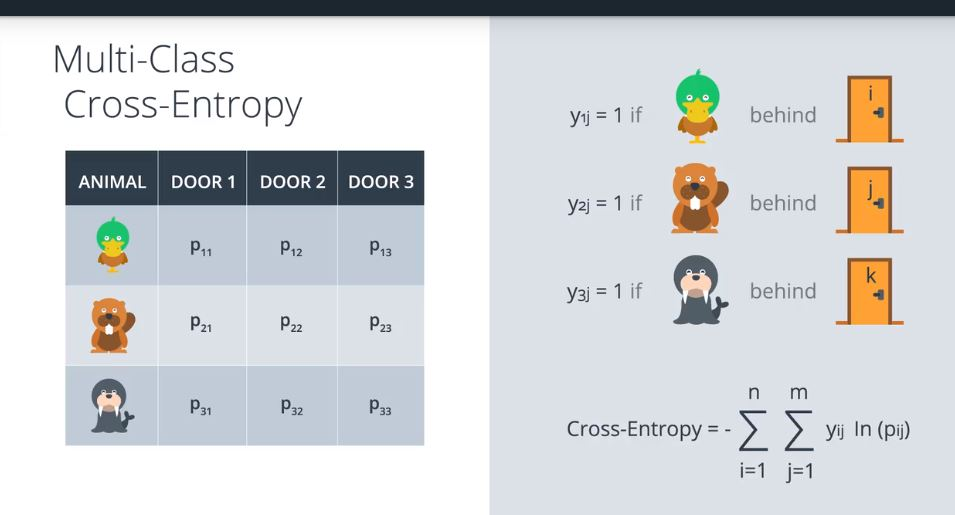